In [444]:
import matplotlib
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from DBLR_cal import BLRc
from IPython.display import Image
from IPython.core.display import HTML 
import fit_library as fit
%matplotlib nbagg

%load_ext autoreload
%autoreload 2
import system_of_units as units
import time
import FEE_vhb as FEE
import tables

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Definitions and Data

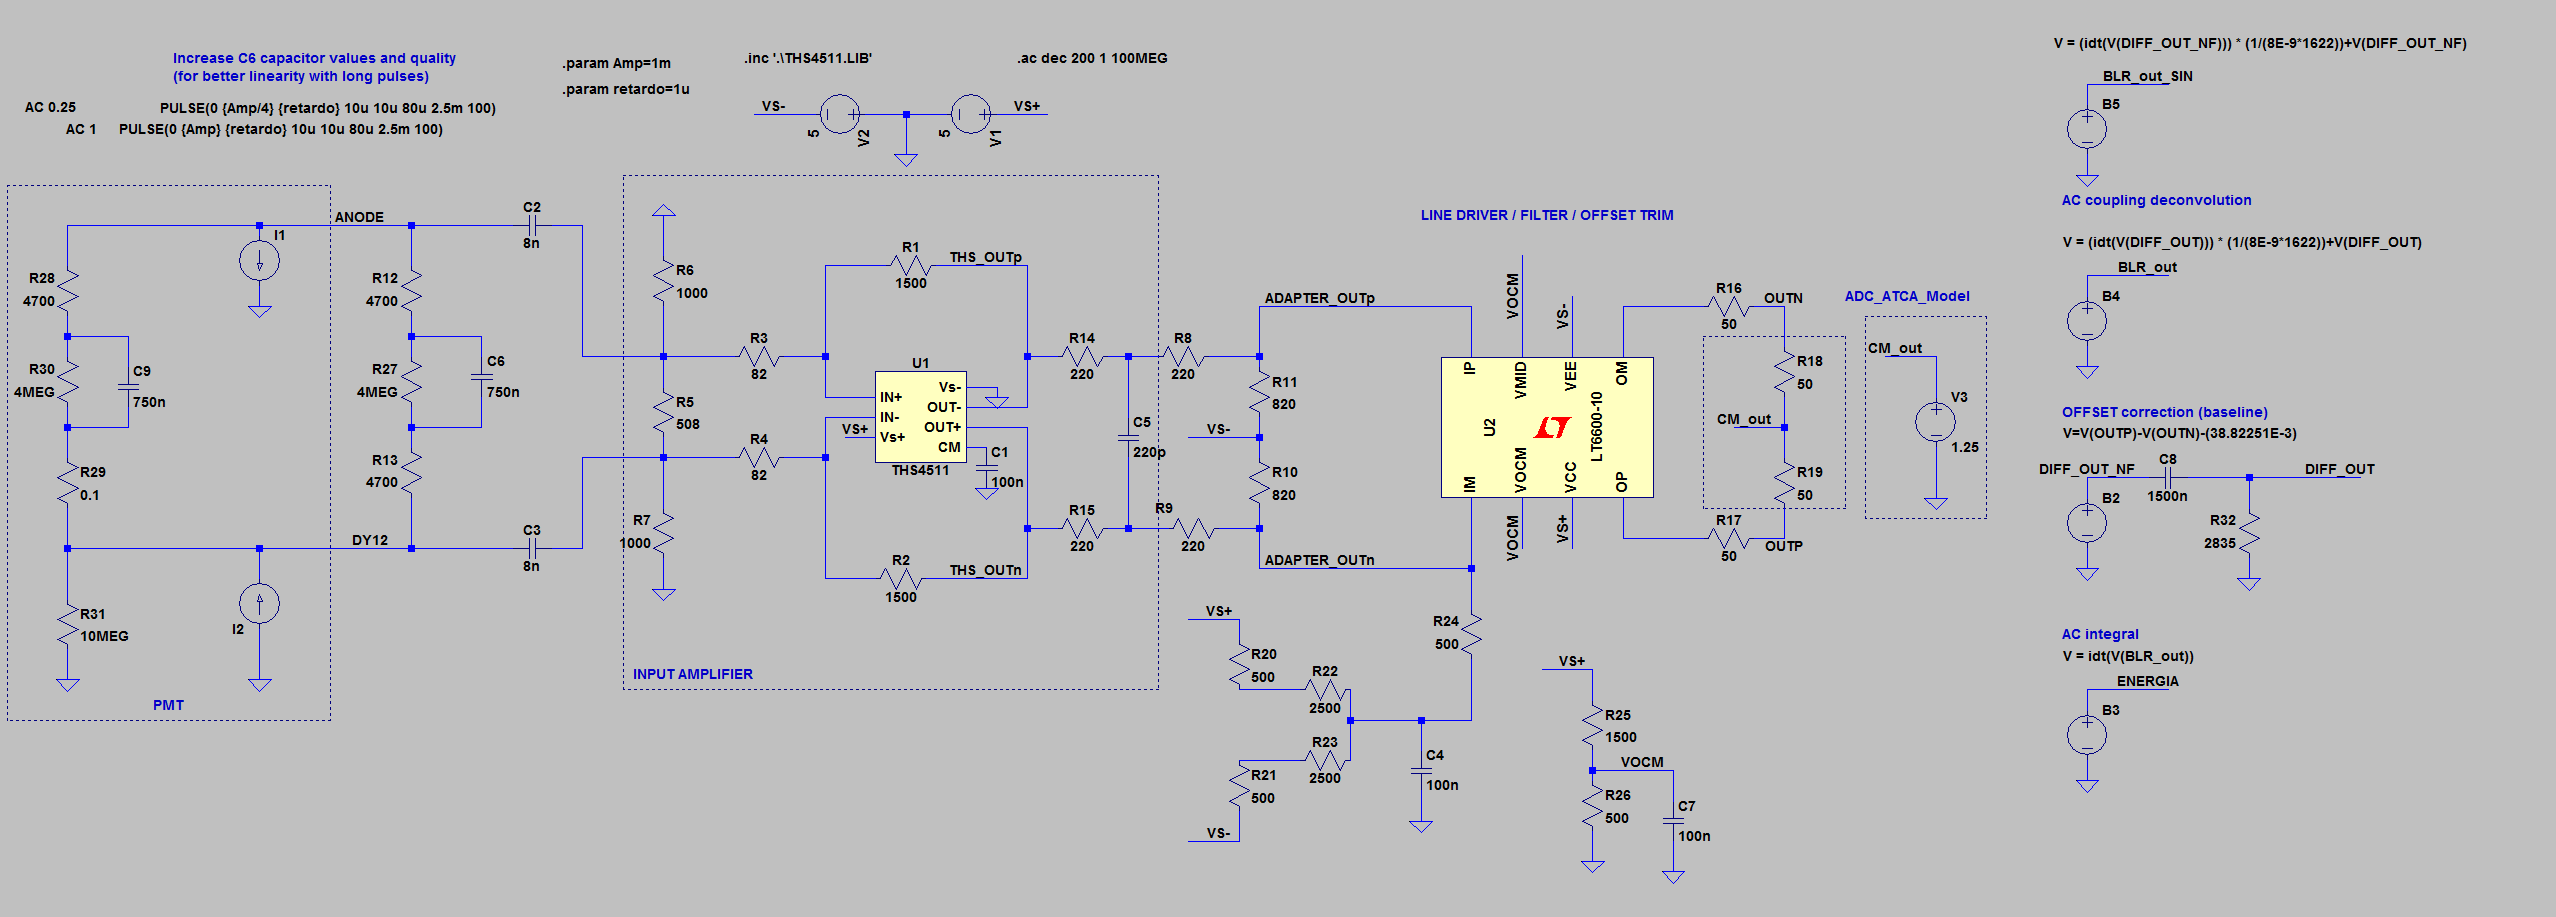

In [445]:
Image(filename = PATH + "FULL_sch.png")

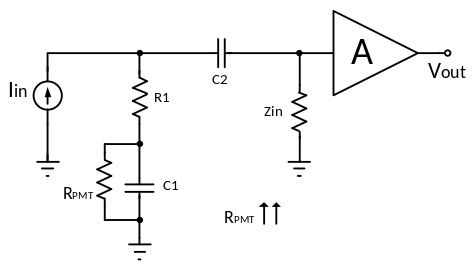

In [446]:
PATH = "./Rpar_Images/"; Image(filename = PATH + "FEE_PMT.png")

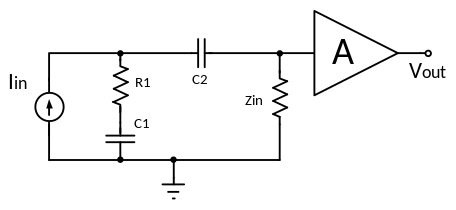

In [447]:
Image(filename = PATH + "FEE_PMT_simple.png")

$$\frac{v_O}{i_I}=\frac{Z_{in}}{(1+\frac{C_1}{C_2})}\frac{1+R_1C_1s}{1+\frac{(R_1+R_2)C_1}{(1+\frac{C1}{C2})}s} = \frac{Z_{in}}{(1+\frac{C_1}{C_2})}.\frac{1}{1+\frac{(R_1+R_2)C_1}{(1+\frac{C_1}{C_2})}s} + \frac{R_1R_2}{R_1+R_2}.\frac{\frac{(R_1+R_2)C_1}{1+\frac{C_1}{C_2}}s}{1+\frac{(R_1+R_2)C_1}{1+\frac{C_1}{C_2}}s}$$

# ==== NOISE MODEL (PMT AND FEE are combined) ====

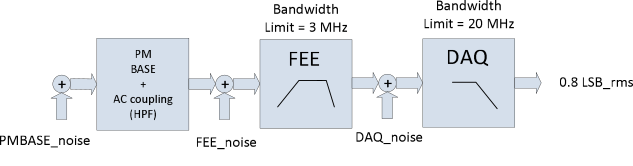

In [448]:
PATH = "./Rpar_Images/"; Image(filename = PATH + "NOISE.png")

$$ GAIN=FEE_{GAIN}.DAQ_{GAIN} $$
$$ $$
$$ vo_{TOTAL_{noise}}^{2} = v_{DAQnoise}^{2}(out) + v_{FEE+PMBnoise}^{2}(out) $$
$$ $$
$$ vo_{TOTAL_{noise}}^{2} = \int_{0}^{BW=3MHz}{v_{FEE+PMBnoise}^{2}.{\lvert}GAIN.H(jw){\rvert}^2}  + \int_{0}^{BW=20MHz}{v_{DAQnoise}^{2}.{\lvert}DAQ_{GAIN}.H(jw){\rvert}^2} $$
$$ $$
$$ vo_{TOTAL_{noise(rms)}} = \sqrt{vo_{TOTAL_{noise}}^{2}} = 0.76LSB_{rms}$$

## MEASURED NOISE 
$$ v_{DAQnoise}^{2}(out) = 0.64 LSB_{rms} = 0.3136 mV_{rms} $$
$$ v_{FEE+PMBnoise}^{2}(out) = 0.41 LSB_{rms} = 0.2009 mV_{rms} $$

In [449]:
#f_sample = (1/25E-9); # Hz
#C1=2714E-9
#C2=8.0E-9
#R1=1567; 
#Zin=62; 
#A=MEASURED_GAIN/(R1*Zin/(R1+Zin))
#GAIN=(R1*Zin/(R1+Zin))*A 
# Seems stupid. It's just to remember true GAIN measured in simulation 

#freq_zero=1/(R1*C1); print 'Zero(Hz) =',freq_zero/(2*np.pi)
#freq_HPF=1/((R1+Zin)*C1/(1+C1/C2)); print 'HPF(kHz) =',freq_HPF/(1E3*2*np.pi)
#freq_LPF1=3E6*2*np.pi;print 'LPF1(MHz) =',freq_LPF1/(1E6*2*np.pi)
#freq_LPF2=10E6*2*np.pi;print 'LPF2(MHz) =',freq_LPF2/(1E6*2*np.pi)

#freq_zerod= freq_zero / (f_sample*np.pi) ; print 'Zero(rad/sec) =',freq_zero,'// (half-cycles/sample) =',freq_zerod
#freq_HPFd=freq_HPF / (f_sample*np.pi) ; print 'HPF(rad/sec) =',freq_HPF,'// (half-cycles/sample) =',freq_HPFd
#freq_LPF1d=freq_LPF1 / (f_sample*np.pi) ; print 'LPF1(rad/sec) =',freq_LPF1,'// (half-cycles/sample) =',freq_LPF1d 
#freq_LPF2d=freq_LPF2 / (f_sample*np.pi) ; print 'LPF2(rad/sec) =',freq_LPF2,'// (half-cycles/sample) =',freq_LPF2d

MEASURED_GAIN = 582.237
DAQ_GAIN = 1.25
SPE = 20; print "SPE (iLSB_ADC)= ", SPE



feep = FEE.FeePmt(gain=MEASURED_GAIN*units.ohm, C2=8*units.nF, C1=2714*units.nF,
                  R1=1567*units.ohm, Zin=62*units.ohm, 
                  f_sample=1./(25*units.ns), f_LPF1=3*units.MHZ, 
                  f_LPF2=10*units.MHZ,
                  noise_FEEPMB_rms=0*units.mA)

LSB_DAQ = 2.0/(2**12); print "LSB_DAQ = ",LSB_DAQ
feep


SPE (iLSB_ADC)=  20
LSB_DAQ =  0.00048828125



        (C1 =  2714.0 nf, 
         C2 =     8.0 nf, 
         R1 =  1567.0 ohm, 
         Zin =    62.0 ohm,
         gain =   582.2 ohm, 
         f_sample =    40.0 MHZ,
         self.freq_LHPF =   12.25 kHz, 
         self.freq_LPF1 =    3.00 MHZ,
         self.freq_LPF2 =   10.00 MHZ,
         self.freq_LHPFd =  0.00061,
         self.freq_LPF1d =    0.15,
         self.freq_LPF2d =    0.50,
         self.noise_FEEPMB_rms =    0.00 mA,
         self.LSB =    0.39 mV)
        

In [450]:
#GAIN_b=A
#b1, a1 = signal.butter(1, freq_HPFd, 'high', analog=False); 
#b2, a2 = signal.butter(1, freq_HPFd, 'low', analog=False);
#b_aux = b2*(Zin/(1+C1/C2))+b1*(Zin*R1/(Zin+R1))
#a_aux = a1 
#b1l, a1l = signal.butter(1, freq_LPF1d, 'low', analog=False); 
#b2l, a2l = signal.butter(4, freq_LPF2d, 'low', analog=False);
#b_auxl = np.convolve(b1l,b2l); a_auxl = np.convolve(a1l,a2l);
#b = GAIN_b*np.convolve(b_auxl,b_aux); a = np.convolve(a_auxl,a_aux);
b,a = FEE.filter_feepmt(feep); b = b/units.ohm

# (b / a) ARE THE COEFFICIENTS OF THE FILTER WE USE TO MODEL THE FEE_PMT

f_sample= 40.0


<IPython.core.display.Javascript object>


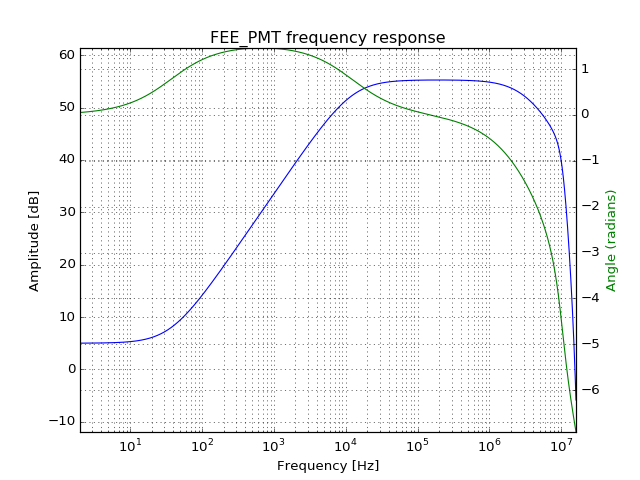

In [451]:
print "f_sample=",feep.f_sample/units.MHZ
w, h = signal.freqz(b, a, worN=np.logspace(-6.5,0.4,40000))                # Freqz outputs rad/sample (desnorm ===> f_sample/(2*pi))
fig = plt.figure(2)
ax1 = fig.add_subplot(111)
plt.semilogx(w*(feep.f_sample/units.hertz)/(2*np.pi), 20 * np.log10(abs(h)))
plt.title('FEE_PMT frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
plt.semilogx(w*(feep.f_sample/units.hertz)/(2*np.pi), angles,'g')
plt.ylabel('Angle (radians)', color='g')
plt.grid()
plt.axis('tight')

plt.show()

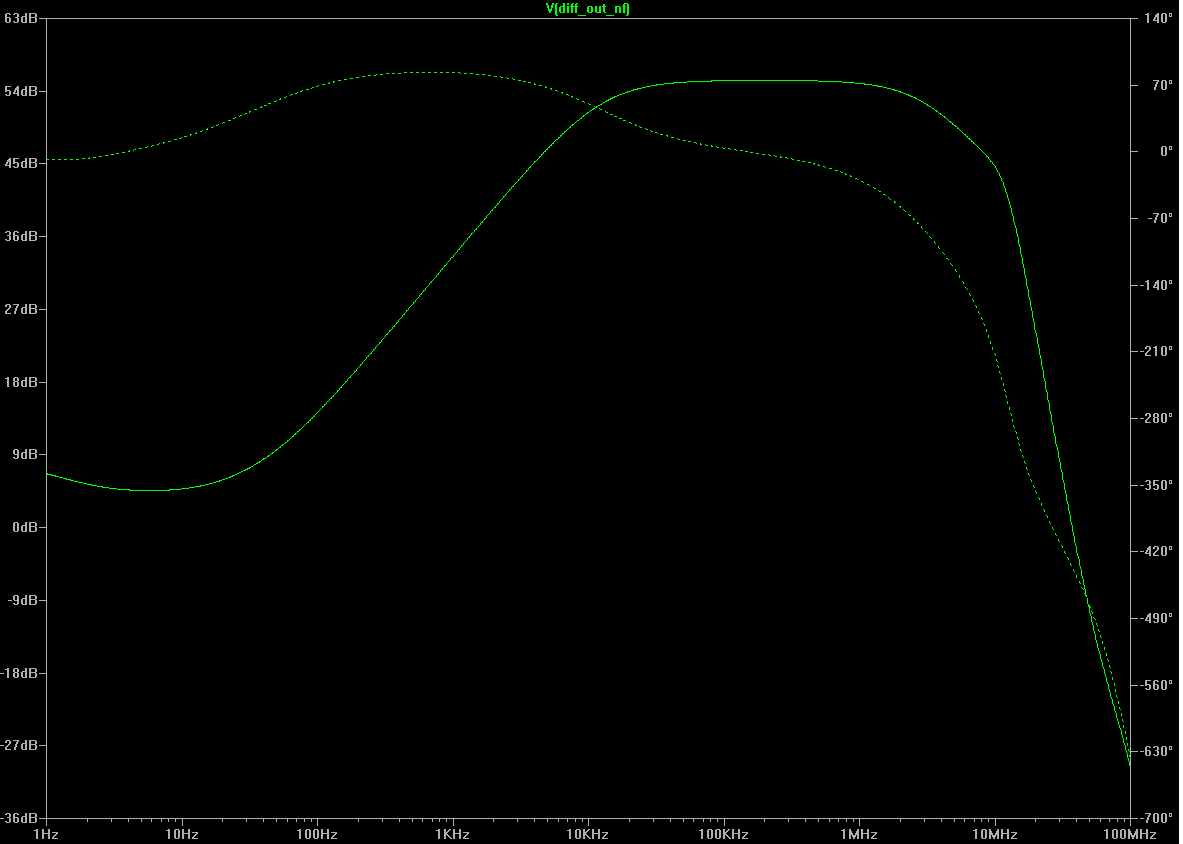

In [452]:
Image(filename = PATH + "FEE_PMT_freq_response_simulated_spice.png")

# MATCH!!!   --VERY CLOSE TO THE SPICE SIMULATED ONE--

# ==============================================

# =======   TEST WITHOUT NOISE   ========

In [453]:
signal_in = np.concatenate((np.zeros(1000),np.linspace(0,0.5,2000),np.linspace(0.5,0,1000),
                            np.linspace(0,1,1000),np.linspace(1,0,2000),
                            np.linspace(0,1,2000),np.linspace(1,0,2000),
                            np.zeros(20000)),axis=0)*units.mA
#signal_out = signal.lfilter(b,a,signal_in[0,0:])
signal_out = FEE.signal_feepmt(feep,signal_in)

<IPython.core.display.Javascript object>


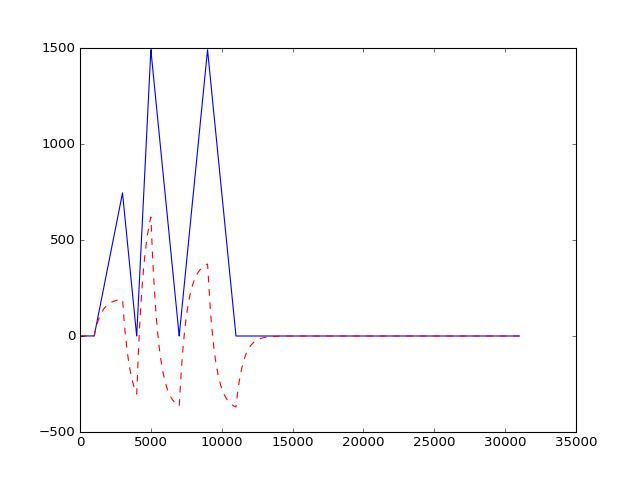

In [454]:
plt.figure(1)
plt.plot(range(0,np.size(signal_in),1),signal_in*feep.GAIN/feep.LSB)
plt.plot(range(0,np.size(signal_in),1),signal_out/feep.LSB,'r--', linewidth=1)
plt.show()

# DECONVOLUTION USING ONLY BLR

<IPython.core.display.Javascript object>


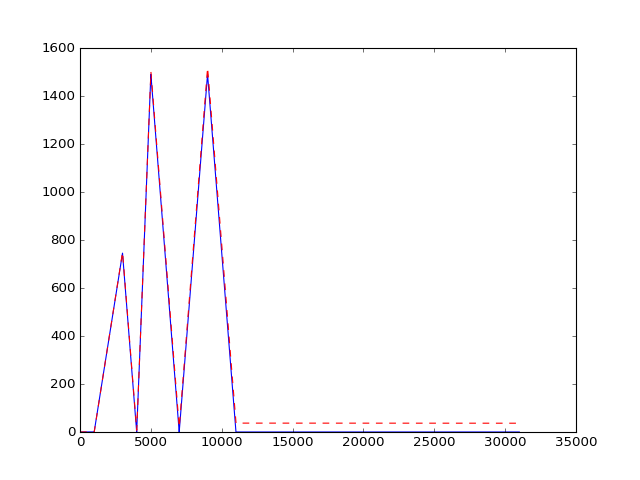

Input Energy = 6334738.56
Reconstructed Energy = 6497823.56228
Error in Energy Computation (%) =  -2.57445513715


In [455]:
recons=BLRc(signal_daq=signal_out/units.volt,coef=feep.freq_LHPFd*np.pi,thr=0.75*feep.LSB/units.volt)
plt.figure(3)
plt.plot(range(0,np.size(signal_in),1),signal_in*feep.GAIN/feep.LSB)
plt.plot(range(0,np.size(recons),1),recons/(feep.LSB/units.volt),'r--', linewidth=1)
plt.show()
energy_mea=np.sum(recons[1000:11000]/(feep.LSB/units.volt))
energy_in=np.sum((signal_in*feep.GAIN)/units.volt/(feep.LSB/units.volt))
print 'Input Energy =', energy_in
print 'Reconstructed Energy =', energy_mea
print 'Error in Energy Computation (%) = ',(energy_in-energy_mea)/energy_in*100

# DECONVOLUTION USING CLEANING FILTER + BLR

In [456]:
# Cleaning Filter as the HPF which cancels the zero at LF
#freq_zero=1/((feep.R1/units.ohm)*(feep.C1/units.farad)); print 'Zero(Hz) =',freq_zero/(2*np.pi);
#freq_zerod= freq_zero / ((feep.f_sample/units.hertz)*np.pi) ; print 'Zero(rad/sec) =',freq_zero,'// (half-cycles/sample) =',freq_zerod
#b_cf, a_cf = signal.butter(1, freq_zerod, 'high', analog=False);

b_cf, a_cf = FEE.filter_cleaner(feep)

Zero(Hz) = 37.4232319905
Zero(rad/sec) = 235.13710139 // (half-cycles/sample) = 1.87116159952e-06


## (b_cf / a_cf) ARE THE COEFFICIENTS OF THE CLEANING FILTER

In [457]:
signal_out_cf = signal.lfilter(b_cf,a_cf,signal_out/units.volt)*units.volt

In [458]:
recons2=BLRc(signal_daq=signal_out_cf/units.volt, coef=feep.freq_LHPFd*np.pi, thr = 0.75*feep.LSB/units.volt)*units.volt

<IPython.core.display.Javascript object>


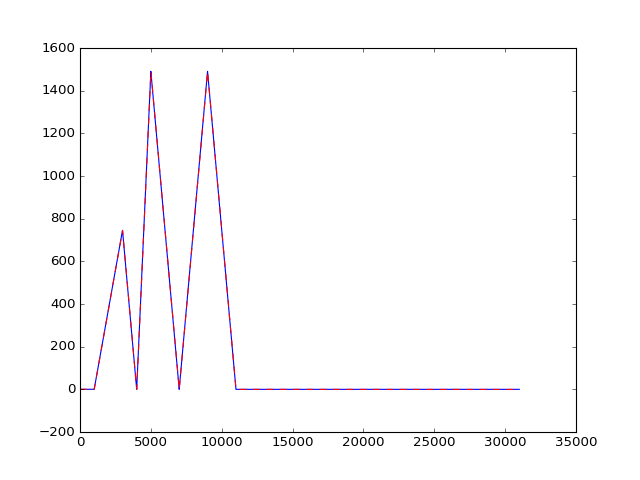

Input Energy = 6334738.56
Reconstructed Energy = 6333662.8326
Error in Energy Computation (%) =  0.0169814017148


In [459]:
plt.figure(4)
plt.plot(range(0,np.size(signal_in),1),signal_in*feep.GAIN/feep.LSB)
plt.plot(range(0,np.size(recons2),1),recons2/feep.LSB,'r--', linewidth=1)
plt.show()
energy_mea2=np.sum(recons2[1000:11000]/feep.LSB)
energy_in2=np.sum(signal_in*feep.GAIN/feep.LSB)
print 'Input Energy =', energy_in2
print 'Reconstructed Energy =', energy_mea2
print 'Error in Energy Computation (%) = ',(energy_in2-energy_mea2)/energy_in2*100

# ... and this is an extreme worst case!!!

# ======  TEST WITH NOISE and DAQ EFFECT ======= 

In [460]:
MEASURED_GAIN = 582.237*units.ohm
DAQ_GAIN = 1.25

DAQn  = FEE.NoisyDAQ(nbits=12, DAQnoise_rms=0.313*units.mV)
DAQn


        (NIBTS = 12, LSB = 0.00049 volts/adc, volts to adc = 0.00039, 
         noise =    0.31)
        

In [461]:
feepN = FEE.FeePmt(gain=MEASURED_GAIN, C2=8*units.nF, C1=2714*units.nF,
                  R1=1567*units.ohm, Zin=62*units.ohm, 
                  f_sample=1./(25*units.ns), f_LPF1=3*units.MHZ, 
                  f_LPF2=10*units.MHZ,
                  noise_FEEPMB_rms=1*DAQn.LSB/(MEASURED_GAIN*DAQ_GAIN))
feepN
# The Equivalent Input Noise must match the noise measured at the output. (1LSB related to output works fine)
# THIS IS OF MAIN importance!!! If the noise is added afterwards the bandwidth is not limited and the 
# LF noise effect do not appear in the BLR.
# Remember that the bandwidth limited noise looks like a AM modulation with a LF frequency component which affects the BLR


        (C1 =  2714.0 nf, 
         C2 =     8.0 nf, 
         R1 =  1567.0 ohm, 
         Zin =    62.0 ohm,
         gain =   582.2 ohm, 
         f_sample =    40.0 MHZ,
         self.freq_LHPF =   12.25 kHz, 
         self.freq_LPF1 =    3.00 MHZ,
         self.freq_LPF2 =   10.00 MHZ,
         self.freq_LHPFd =  0.00061,
         self.freq_LPF1d =    0.15,
         self.freq_LPF2d =    0.50,
         self.noise_FEEPMB_rms =    0.00 mA,
         self.LSB =    0.39 mV)
        

In [462]:
signal_in = np.concatenate((np.zeros(1000),np.linspace(0,0.5,2000),np.linspace(0.5,0,1000),
                            np.linspace(0,1,1000),np.linspace(1,0,2000),
                            np.linspace(0,1,2000),np.linspace(1,0,2000),
                            np.zeros(20000)),axis=0)*units.mA
#signal_out = signal.lfilter(b,a,signal_in[0,0:])
signal_outn = FEE.signal_feepmt(feepN,signal_in)*DAQ_GAIN

RUIDO (Arms) =  6.70903772862e-07


<IPython.core.display.Javascript object>


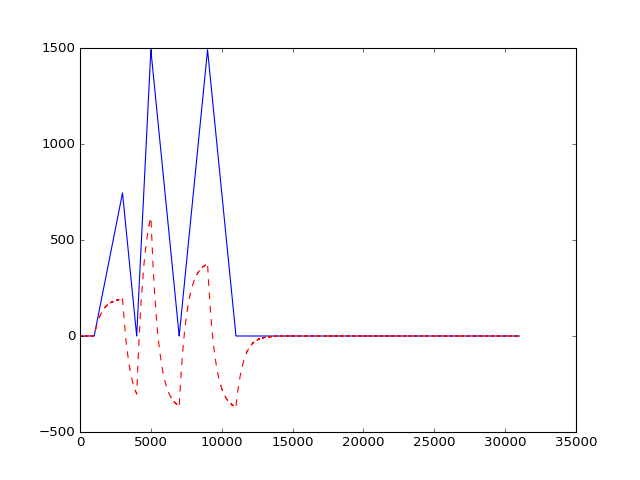

TRUE Out Noise FEE (LSB_rms) = 0.391482523224


In [463]:
plt.figure(5)
plt.plot(range(0,np.size(signal_in),1),DAQ_GAIN*signal_in*feep.GAIN/DAQn.LSB)
plt.plot(range(0,np.size(signal_outn),1),signal_outn/DAQn.LSB,'r--', linewidth=1)

plt.show()
print "TRUE Out Noise FEE (LSB_rms) =",np.std(signal_outn[25000:26000]/DAQn.LSB,ddof=1)

# So the FEE output noise contribution matches with measurements

In [464]:
signal_outnd = FEE.noise_adc(DAQn, signal_outn)

<IPython.core.display.Javascript object>


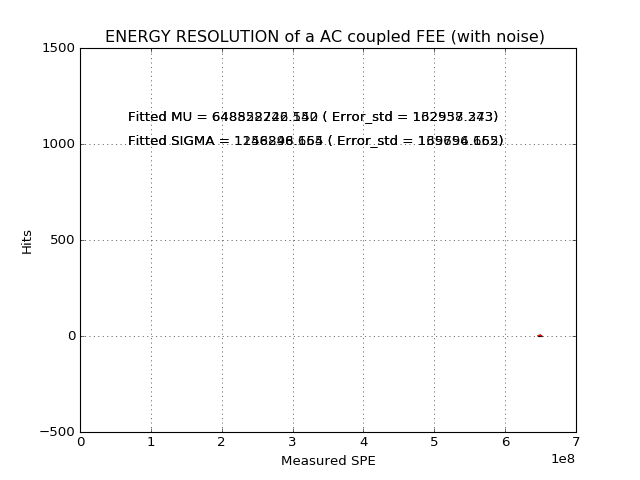

TRUE TOTAL Out Noise (LSB_rms) = 0.750338789587


In [465]:
plt.figure(6)
plt.plot(range(0,np.size(signal_in),1),DAQ_GAIN*signal_in*feep.GAIN/DAQn.LSB)
plt.plot(range(0,np.size(signal_outnd),1),signal_outnd/DAQn.LSB,'r--', linewidth=1)

plt.show()
print "TRUE TOTAL Out Noise (LSB_rms) =",np.std(signal_outnd[25000:26000]/DAQn.LSB,ddof=1)

# Reconstruct with Cleaning Filter

In [466]:
b_cf, a_cf = FEE.filter_cleaner(feepN)
signal_out_cf2 = signal.lfilter(b_cf,a_cf,signal_outnd/units.volt)*units.volt

Zero(Hz) = 37.4232319905
Zero(rad/sec) = 235.13710139 // (half-cycles/sample) = 1.87116159952e-06


In [467]:
recons3=BLRc(signal_daq=signal_out_cf2/units.volt, coef=feepN.freq_LHPFd*np.pi, thr = 0.75*feepN.LSB/units.volt)*units.volt

<IPython.core.display.Javascript object>


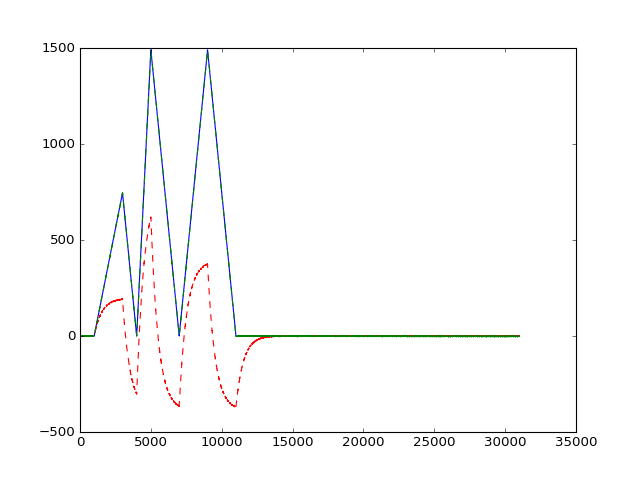

Input Energy = 6334738.56
Reconstructed Energy = 6329837.91013
Error in Energy Computation (%) =  0.0773615172698


In [468]:
plt.figure(7)
plt.plot(range(0,np.size(signal_in),1),DAQ_GAIN*signal_in*feep.GAIN/DAQn.LSB)
plt.plot(range(0,np.size(signal_outnd),1),signal_outnd/DAQn.LSB,'r--', linewidth=1)
plt.plot(range(0,np.size(recons3),1),recons3/DAQn.LSB,'g--', linewidth=1)
plt.show()
energy_mea3=np.sum(recons3[1000:11000]/DAQn.LSB)
energy_in3=np.sum(signal_in*feep.GAIN*DAQ_GAIN/DAQn.LSB)
print 'Input Energy =', energy_in3
print 'Reconstructed Energy =', energy_mea3
print 'Error in Energy Computation (%) = ',(energy_in3-energy_mea3)/energy_in3*100

# ======  STATISTICS  ======

In [476]:
MEASURED_GAIN = 582.237*units.ohm
DAQ_GAIN = 1.25
DAQn  = FEE.NoisyDAQ(nbits=12, DAQnoise_rms=0.313*units.mV)

feepN = FEE.FeePmt(gain=MEASURED_GAIN, C2=8*units.nF, C1=2714*units.nF,
                  R1=1567*units.ohm, Zin=62*units.ohm, 
                  f_sample=1./(25*units.ns), f_LPF1=3*units.MHZ, 
                  f_LPF2=10*units.MHZ,
                  noise_FEEPMB_rms=1*DAQn.LSB/(MEASURED_GAIN*DAQ_GAIN))


signal_in = np.concatenate((np.zeros(1000),np.linspace(0,0.5,2000),np.linspace(0.5,0,1000),
                            np.linspace(0,1,1000),np.linspace(1,0,2000),
                            np.linspace(0,1,2000),np.linspace(1,0,2000),
                            np.zeros(20000)),axis=0)*units.mA

recons_a = np.zeros(10000)
for i in range(0,10000):
    signal_outn = FEE.signal_feepmt(feepN,signal_in)*DAQ_GAIN
    signal_outnd = FEE.noise_adc(DAQn, signal_outn)
    b_cf, a_cf = FEE.filter_cleaner(feepN)
    signal_out_cf2 = signal.lfilter(b_cf,a_cf,signal_outnd/units.volt)*units.volt
    recons3=BLRc(signal_daq=signal_out_cf2/units.volt, coef=feepN.freq_LHPFd*np.pi, thr = 0.75*feepN.LSB/units.volt)*units.volt
    recons_a[i]=np.sum(recons3[1000:11000]/DAQn.LSB)



<IPython.core.display.Javascript object>


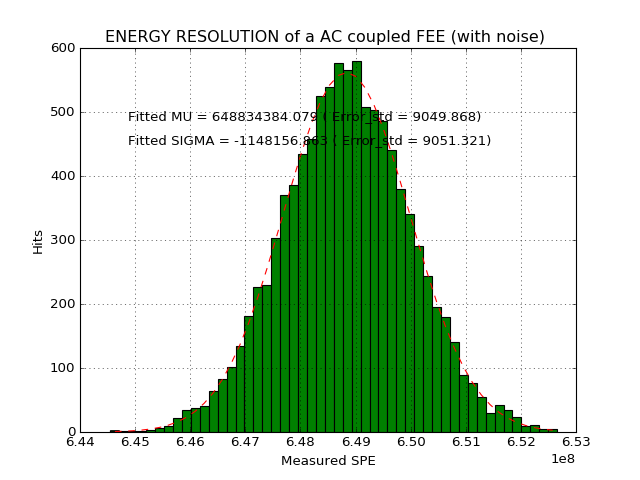

('Fitted A = ', 561.8128391856003, '( Error_std=', 3.8351094776535852, ')')
('Fitted MU = ', 648834384.07886612, '( Error_std=', 9049.8680914456017, ')')
('FItted SIGMA = ', -1148156.8627986507, '( Error_std=', 9051.3214787066554, ')')
ENERGY RESOLUTION (%) =  -0.415848588451


In [477]:
[coef,error]=fit.gauss1_fit(recons_a/LSB_DAQ/SPE,'Measured SPE','Hits','ENERGY RESOLUTION of a AC coupled FEE (with noise) ',50,8,1)
print "ENERGY RESOLUTION (%) = ",(coef[2]/coef[1])*100*2.35